In [5]:
X=[[500],[700],[900]]   # Sqrt

y= [30,50,70]    # Price

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X,y)

LinearRegression()

In [10]:
model.predict([[1200],[1500],[2500],[5000]])

array([100., 130., 230., 480.])

## here we have sqrt and number of floors

In [18]:
X =[[500,2],[700,5],[900,4]]   # sqrt & no.of floors
y=[30,50,70]    # costs

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X,y)

LinearRegression()

In [22]:
model.predict([[1200,6],[1300,4],[1500,2]])

array([100., 110., 130.])

## Simple Linear Regression

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('/content/Salary_Data.csv')

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
df.shape

(30, 2)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [30]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

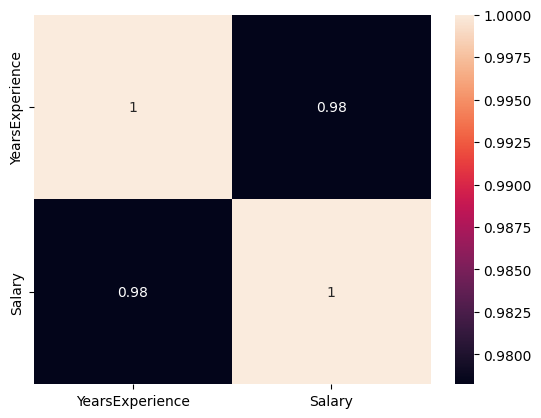

In [32]:
import seaborn as sns
sns.heatmap(df.corr(),annot =True)

<ipython-input-33-f35941374136>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

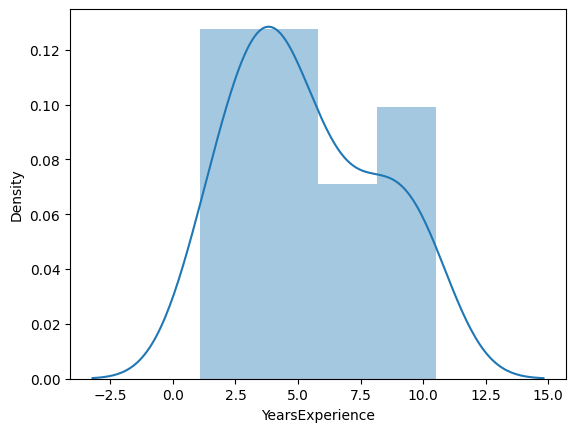

In [33]:
sns.distplot(df.YearsExperience)

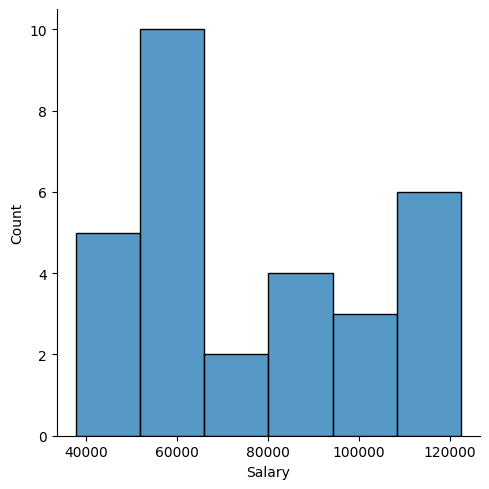

In [34]:
sns.displot(df.Salary)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

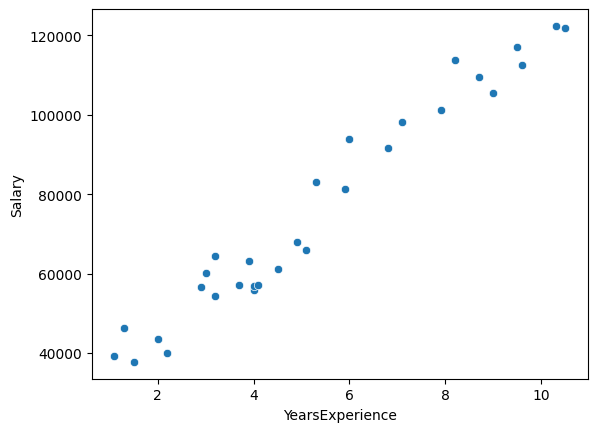

In [37]:
sns.scatterplot(x=df.YearsExperience,y=df.Salary)

## X and y split

In [38]:
X = df.drop(columns =['Salary'],axis =1)
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [40]:
y = df.Salary
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

## Train test split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [42]:
x_train.shape

(24, 1)

In [43]:
x_test.shape

(6, 1)

In [48]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [49]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

## Model building

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train,y_train) # fitting the model on the training data

LinearRegression()

In [50]:
y_pred =model.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [51]:
## Compare

sal = pd.DataFrame({'Actual salary':y_test,'Predictd salary':y_pred})
sal


,Actual salary,Predictd salary
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [52]:
# predict on random value

model.predict([[2.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47267.76442943])

In [53]:
model.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([213031.60168521])